# Image Enhancement and Filtering Techniques - Spatial Domain


## Basic Point Operations for Image Enhancement

Basic point operations are fundamental techniques in digital image processing that modify pixel values to enhance image quality or extract specific features.


### Contrast Stretching
- Improves image contrast by stretching the range of intensity values
- Maps the original intensity values to span the full range (0-255)
- Useful when image has low contrast or narrow intensity range

**Also known as histogram stretching.**

#$# Thresholding
- Converts grayscale image to binary image
- Pixels above threshold become white (255)
- Pixels below threshold become black (0)
- Effective for segmentation and object detection

### Digital Negative
- Inverts pixel intensities
- New pixel value = 255 - original value
- Useful for enhancing white or gray details in dark regions
- Common in medical imaging

### Intensity Level Slicing
- Highlights specific range of intensities
- Pixels within range are set to maximum value
- Pixels outside range are set to minimum value
- Helps visualize structures with similar intensity levels

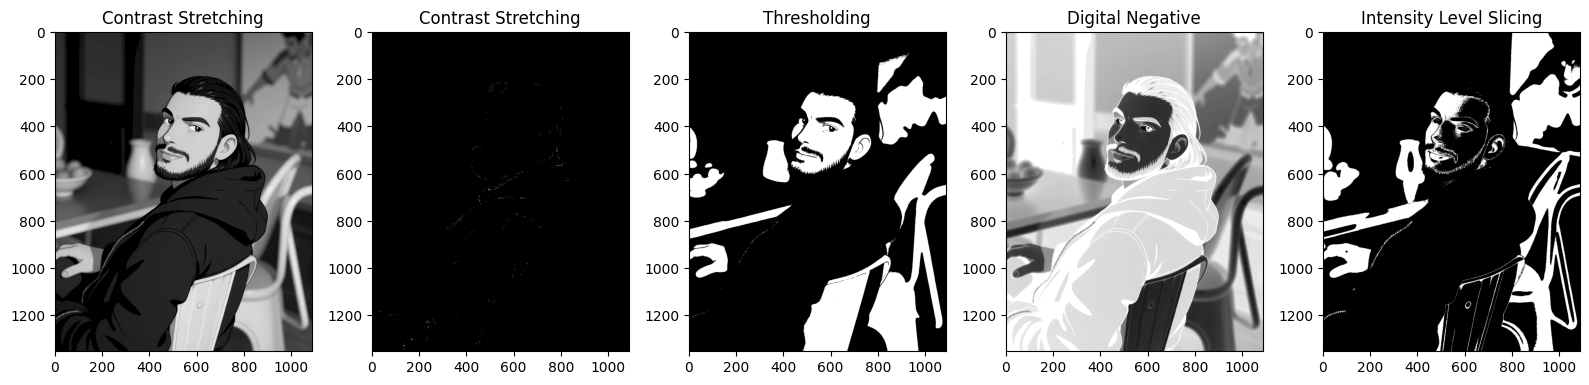

In [39]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

# load image
img = cv2.imread('images/myimg.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 8))
plt.subplot(151)
plt.title('Contrast Stretching')
plt.imshow(img, cmap='gray')


# Contrast Stretching
def contrast_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    return ((img - min_val) * 255 / (max_val - min_val)).astype(np.uint8)

contrast_img = contrast_stretch(img)
plt.subplot(152)
plt.title('Contrast Stretching')
plt.imshow(contrast_img, cmap='gray')

thresh_img = (img > 127).astype(np.uint8) * 255
plt.subplot(153)
plt.title('Thresholding')
plt.imshow(thresh_img, cmap='gray')

negative_img = 255 - img 
# If you are confused how this work ? Remember..... the feature of numpy array, if you substract if from scaler it will substract from each element of the array
# So 255 - img will substract each element of the array from 255
plt.subplot(154)  
plt.title('Digital Negative')
plt.imshow(negative_img, cmap='gray')

def intensity_slice(img, min_range=100, max_range=200):
    sliced = img.copy()
    sliced[(img >= min_range) & (img <= max_range)] = 255
    sliced[(img < min_range) | (img > max_range)] = 0
    return sliced

sliced_img = intensity_slice(img)
plt.subplot(155)  
plt.title('Intensity Level Slicing')
plt.imshow(sliced_img, cmap='gray')
plt.tight_layout()
plt.show()

In [40]:
list_test = [1,2,3,2,4,4,6,7,5,0]
np_list_test = np.array(list_test)

print(7-np_list_test)

[6 5 4 5 3 3 1 0 2 7]


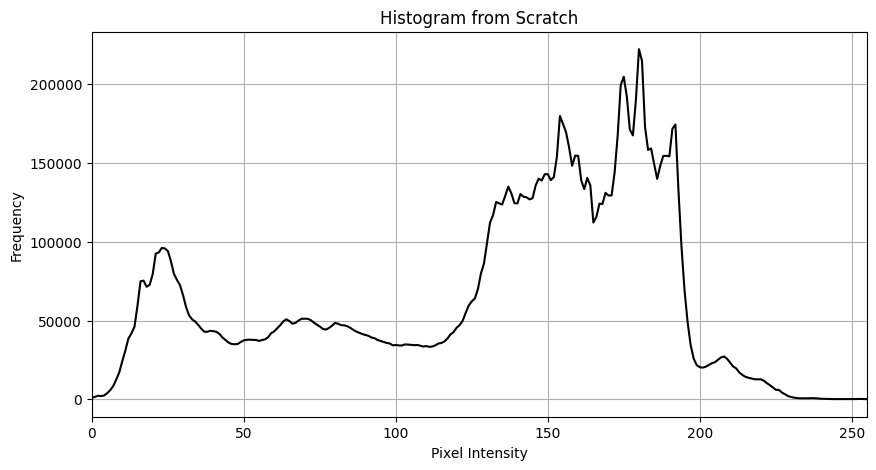

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    hist = np.zeros(256)
    for pixel in image.ravel():
        hist[pixel] += 1
        # print(hist[pixel])
    return hist

image = cv2.imread('gg.png', cv2.IMREAD_GRAYSCALE)

histogram = calculate_histogram(image)
# print(histogram)
plt.figure(figsize=(10, 5))
plt.plot(histogram, color='black')
plt.title('Histogram from Scratch')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid()
plt.show()

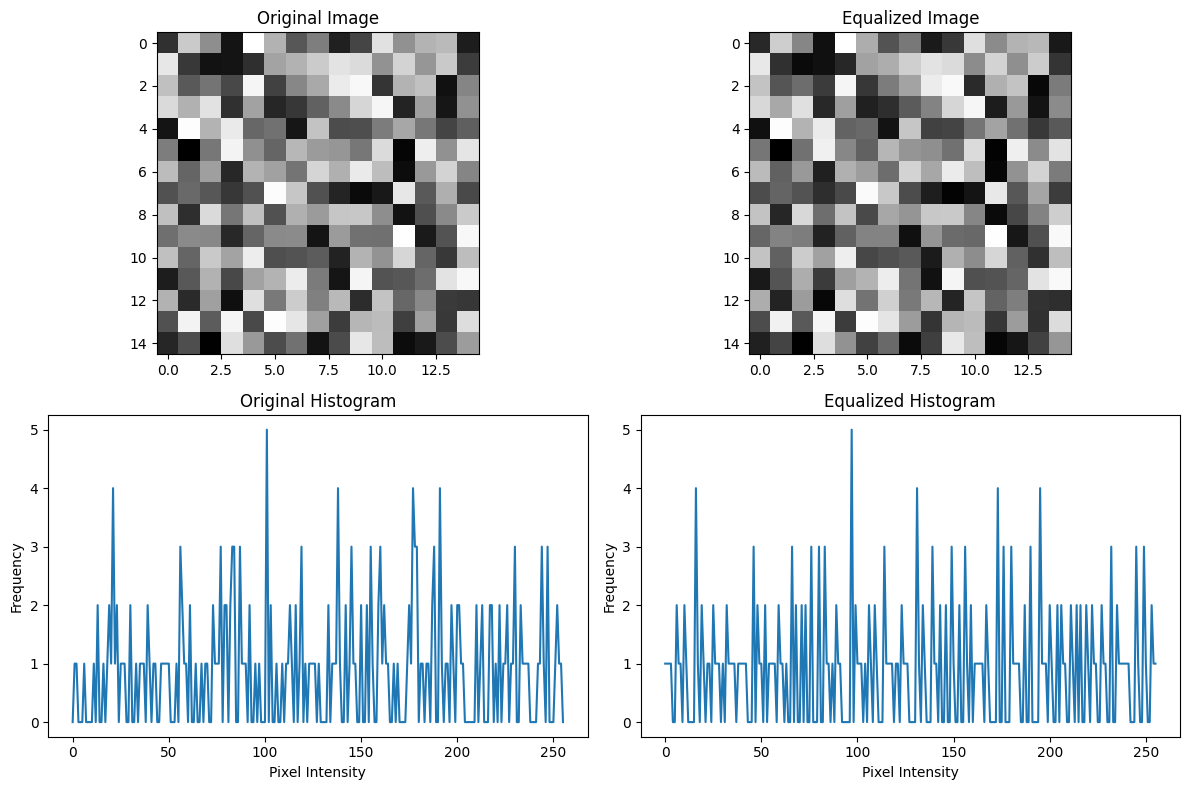

In [42]:
# On a random 30x30 image
test_image = np.random.randint(0, 256, size=(15, 15), dtype=np.uint8)
equalized = cv2.equalizeHist(test_image)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.imshow(test_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(equalized, cmap='gray')
ax2.set_title('Equalized Image')

original_hist = calculate_histogram(test_image)
equalized_hist = calculate_histogram(equalized)

ax3.plot(original_hist)
ax3.set_title('Original Histogram')
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')

ax4.plot(equalized_hist)
ax4.set_title('Equalized Histogram')
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

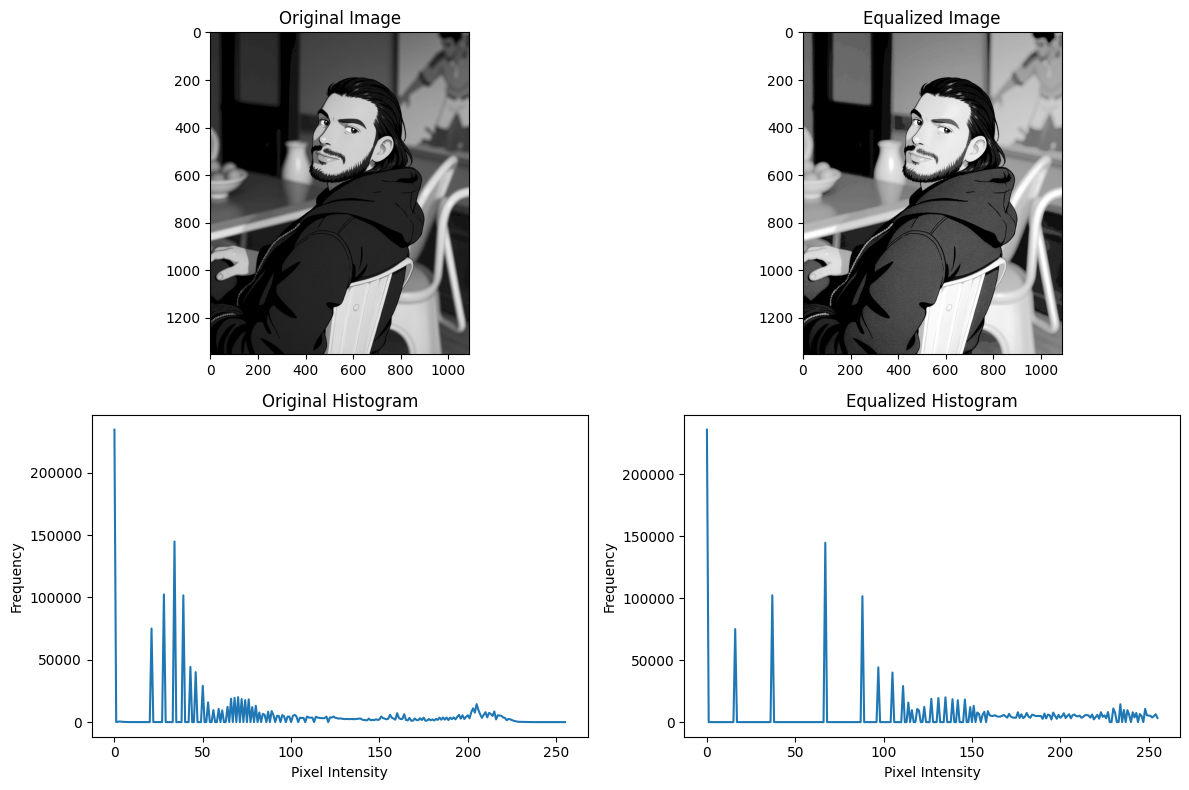

In [43]:
# own image
img = cv2.imread('images/myimg.png', cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(img)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(equalized, cmap='gray')
ax2.set_title('Equalized Image')

original_hist = calculate_histogram(img)
equalized_hist = calculate_histogram(equalized)

ax3.plot(original_hist)
ax3.set_title('Original Histogram')
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')

ax4.plot(equalized_hist)
ax4.set_title('Equalized Histogram')
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Smoothing Spatial Filters

## Spatial Smoothing Filters

Spatial smoothing filters reduce noise by averaging/filtering pixel values within a local neighborhood.

### Linear Filters:
- **Mean (Average) Filter**: 
    - Uses a uniform 3x3 kernel 
    ```
    [1/9, 1/9, 1/9]
    [1/9, 1/9, 1/9]
    [1/9, 1/9, 1/9]
    ```
    - Simple averaging of pixels in neighborhood
    - Blurs image evenly

- **Weighted Average Filter**:
    - Uses center-weighted 3x3 kernel 
    ```
    [1/16, 2/16, 1/16]
    [2/16, 4/16, 2/16]
    [1/16, 2/16, 1/16]
    ```
    - Center pixel has higher weight
    - Preserves more detail than mean filter

### Non-Linear Filters:
- Don't use convolution kernels
- Use statistical operations on neighborhood pixels

- **Median Filter**:
    - Selects middle value in sorted neighborhood
    - Good for removing salt & pepper noise
    - Preserves edges better than mean filter

- **Min/Max Filters**: 
    - Select minimum/maximum values in neighborhood
    - Min darkens image, max brightens
    - Useful for specific noise types

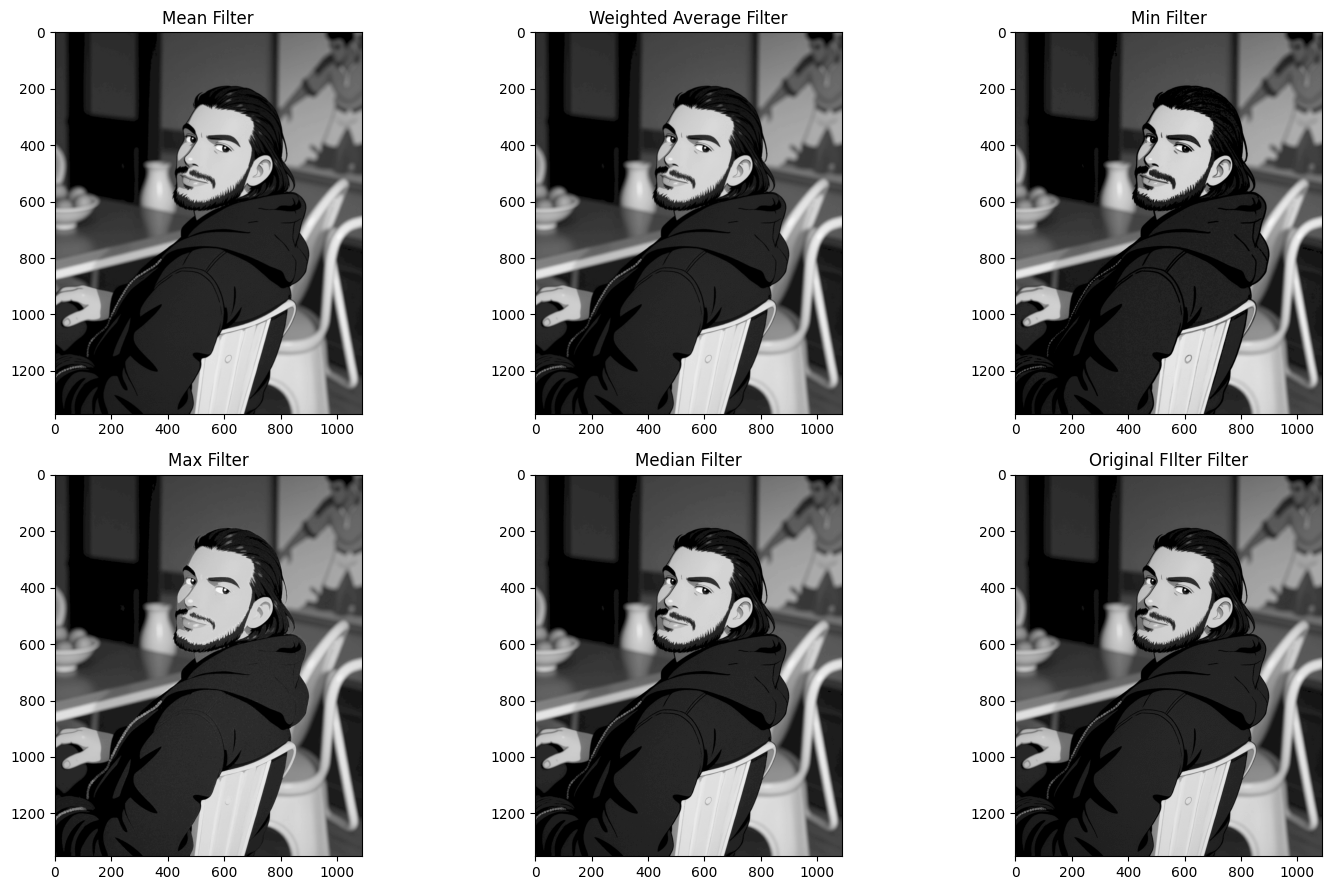

In [44]:

def apply_mean_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.mean(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_weighted_average(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    # Create weighted kernel (center pixel has higher weight)
    weights = np.ones((kernel_size, kernel_size))
    center = kernel_size // 2
    weights[center, center] = 2  
    weights = weights / np.sum(weights)  # Normalize weights
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i,j] = np.sum(window * weights)
    return result.astype(np.uint8)

def apply_min_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.min(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_max_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.max(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_median_filter(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.median(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

img = cv2.imread('images/myimg.png', cv2.IMREAD_GRAYSCALE)

mean_filtered = apply_mean_filter(img)
weighted_average_filtered = apply_weighted_average(img)
min_filtered = apply_min_filter(img)
max_filtered = apply_max_filter(img)
median_filtered = apply_median_filter(img)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 9))

ax1.imshow(mean_filtered, cmap='gray')
ax1.set_title('Mean Filter')
ax2.imshow(weighted_average_filtered, cmap='gray')
ax2.set_title('Weighted Average Filter')
ax3.imshow(min_filtered, cmap='gray')
ax3.set_title('Min Filter')
ax4.imshow(max_filtered, cmap='gray')
ax4.set_title('Max Filter')
ax5.imshow(median_filtered, cmap='gray')
ax5.set_title('Median Filter')
ax6.imshow(img, cmap='gray')
ax6.set_title('Original FIlter Filter')


plt.tight_layout()
plt.show()

## Sharpening Filters

Sharpening filters enhance edges and fine details in images. Common techniques include:

### Laplacian Filters
- Second-order derivative filter that detects rapid intensity changes
- Emphasizes edges in all directions
- Basic 3x3 Laplacian kernel:
    ```
    [ 0  1  0]
    [ 1 -4  1]
    [ 0  1  0]
    ```
- Sharpening achieved by subtracting Laplacian from original image

### Gradient-Based Filters

#### Sobel Filter
- First-order derivative filter that computes gradient magnitude
- Uses separate kernels for x and y directions
- Sobel x-direction:
    ```
    [-1  0  1]
    [-2  0  2] 
    [-1  0  1]
    ```
- Sobel y-direction:
    ```
    [-1 -2 -1]
    [ 0  0  0]
    [ 1  2  1]
    ```
- Final gradient magnitude = sqrt(Gx^2 + Gy^2)
- Good at detecting vertical and horizontal edges

#### Prewitt Filter
- Similar to Sobel but with simpler coefficients
- Less emphasis on central pixels
- Prewitt x-direction:
    ```
    [-1  0  1]
    [-1  0  1]
    [-1  0  1]
    ```
- Prewitt y-direction:
    ```
    [-1 -1 -1]
    [ 0  0  0]
    [ 1  1  1]
    ```
- More sensitive to noise than Sobel

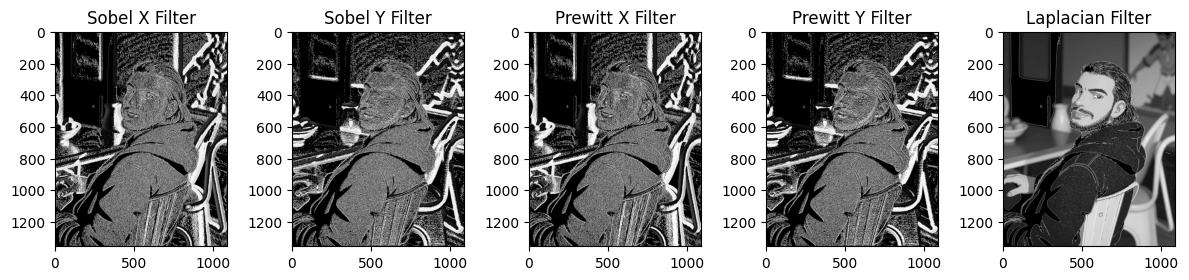

In [45]:
def apply_laplacian(image):
    kernel = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
    padded = np.pad(image, pad_width=1, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.sum(padded[i:i+3, j:j+3] * kernel)
    return image - result

def apply_sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    padded = np.pad(image, pad_width=1, mode='reflect')
    gx = np.zeros_like(image)
    gy = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gx[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_x)
            gy[i,j] = np.sum(padded[i:i+3, j:j+3] * sobel_y)
    
    # return np.sqrt(gx**2 + gy**2).astype(np.uint8)
    return gx.astype(np.uint8),gy.astype(np.uint8)

def apply_prewitt(image):
    prewitt_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    padded = np.pad(image, pad_width=1, mode='reflect')
    gx = np.zeros_like(image)
    gy = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gx[i,j] = np.sum(padded[i:i+3, j:j+3] * prewitt_x)
            gy[i,j] = np.sum(padded[i:i+3, j:j+3] * prewitt_y)
    
    # return np.sqrt( gy**2).astype(np.uint8)
    return gx.astype(np.uint8),gy.astype(np.uint8)

sobel_filtered1,sobel_filtered2 = apply_sobel(img)
prewitt_filtered1,prewitt_filtered2 = apply_prewitt(img)
laplacian_filtered = apply_laplacian(img)

fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(12, 4))
ax1.imshow(sobel_filtered1, cmap='gray')
ax1.set_title('Sobel X Filter')
ax2.imshow(sobel_filtered2, cmap='gray')
ax2.set_title('Sobel Y Filter')
ax3.imshow(prewitt_filtered1, cmap='gray')
ax3.set_title('Prewitt X Filter')
ax4.imshow(prewitt_filtered2, cmap='gray')
ax4.set_title('Prewitt Y Filter')
ax5.imshow(laplacian_filtered, cmap='gray')
ax5.set_title('Laplacian Filter')
plt.tight_layout()
plt.show()


## Image Magnification ( replication and interpolation )

Shape of replicated image:	 (10, 10)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  74.   0. 127.   0.  74.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 127.   0. 255.   0. 127.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  74.   0. 127.   0.  74.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
----------------------------------------------------------------------------------------------------
[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   37.   74.  100.5 127.  100.5  74.   37.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   63.5 127.  191.  255.  191.  127.   63.5   0.    0. ]
 [  0.    0.    

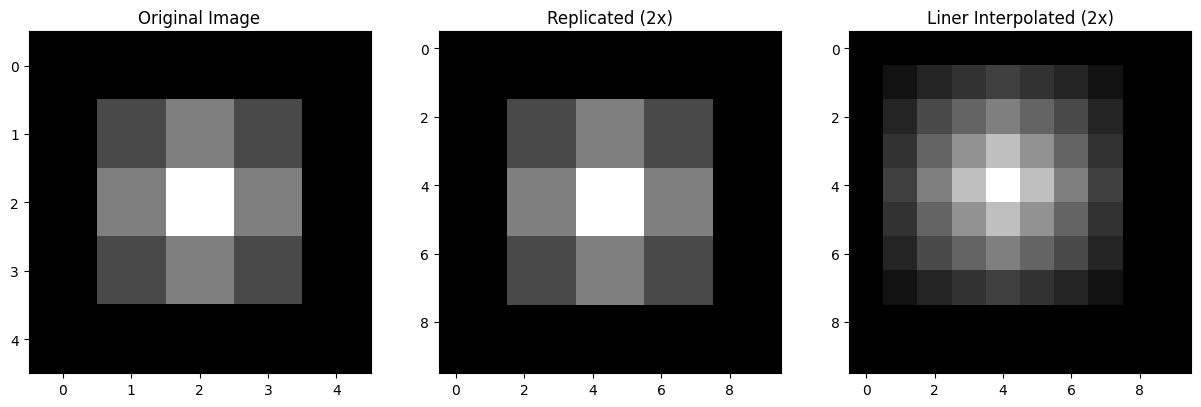

In [46]:
def create_synthetic_image(size=5):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    return (255 * (1 - R)).clip(0, 255).astype(np.uint8)

img = create_synthetic_image(5)  


def replicate_zoom(image, scale_factor):
    # Step 1: Row-wise replication (duplicate columns)
    row_zoomed = np.repeat(image, scale_factor, axis=1)

    # Step 2: Column-wise replication (duplicate rows)
    fully_zoomed = np.repeat(row_zoomed, scale_factor, axis=0)

    return fully_zoomed

def magnify_interpolation(image):
    h, w = image.shape
    new_h, new_w = 2 * h, 2 * w
    output = np.zeros((new_h, new_w), dtype=float)

    # Step 1: Copy original pixels to even indices
    for i in range(h):
        for j in range(w):
            output[2*i, 2*j] = image[i, j]
    print(output)
    print("-"*100)

    # Step 2: Interpolate columns (horizontal)
    for i in range(0, new_h, 2):
        for j in range(1, new_w, 2):
            left = output[i, j - 1]
            right = output[i, j + 1] if j + 1 < new_w else 0
            output[i, j] = (left + right) / 2
    print(output)
    print("-"*100)
    # Step 3: Interpolate rows (vertical)
    for i in range(1, new_h, 2):
        for j in range(new_w):
            top = output[i - 1, j]
            bottom = output[i + 1, j] if i + 1 < new_h else 0
            output[i, j] = (top + bottom) / 2
    print(output)
    return output

scale_factor = 2
replicated = replicate_zoom(img, scale_factor)
print("Shape of replicated image:\t",replicated.shape)
interpolated = magnify_interpolation(img)
print("Shape of interpolated image:\t",interpolated.shape)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(replicated, cmap='gray')
ax2.set_title('Replicated (2x)')
ax3.imshow(interpolated, cmap='gray')
ax3.set_title('Liner Interpolated (2x)')
plt.show()

#### Testing...interpolation

In [47]:
import numpy as np

def double_size_interpolation(image):
    h, w = image.shape
    new_h, new_w = 2 * h, 2 * w
    output = np.zeros((new_h, new_w), dtype=float)

    # Step 1: Copy original pixels to even indices
    for i in range(h):
        for j in range(w):
            output[2*i, 2*j] = image[i, j]
    print(output)
    print("-"*100)

    # Step 2: Interpolate columns (horizontal)
    for i in range(0, new_h, 2):
        for j in range(1, new_w, 2):
            left = output[i, j - 1]
            right = output[i, j + 1] if j + 1 < new_w else 0
            output[i, j] = (left + right) / 2
    print(output)
    print("-"*100)
    
    # Step 3: Interpolate rows (vertical)
    for i in range(1, new_h, 2):
        for j in range(new_w):
            top = output[i - 1, j]
            bottom = output[i + 1, j] if i + 1 < new_h else 0
            output[i, j] = (top + bottom) / 2
    print(output)
 
    return output
img = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 8, 6, 7],
    [0, 1, 2, 3]
])

zoomed = double_size_interpolation(img)




[[1. 0. 2. 0. 3. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 6. 0. 7. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [9. 0. 8. 0. 6. 0. 7. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 2. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
----------------------------------------------------------------------------------------------------
[[1.  1.5 2.  2.5 3.  3.5 4.  2. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [5.  5.5 6.  6.5 7.  7.5 8.  4. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [9.  8.5 8.  7.  6.  6.5 7.  3.5]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 1.  1.5 2.  2.5 3.  1.5]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]
----------------------------------------------------------------------------------------------------
[[1.   1.5  2.   2.5  3.   3.5  4.   2.  ]
 [3.   3.5  4.   4.5  5.   5.5  6.   3.  ]
 [5.   5.5  6.   6.5  7.   7.5  8.   4.  ]
 [7.   7.   7.   6.75 6.5  7.   7.5  3.75]
 [9.   8.5  8.   7.   6.   6.5  7.   3.5 ]
 [4.5  4.5  4.5  4.25 4.   4.5  5.   2.5 ]
 [0.   0.5  1.   1.5  2.   2.5  3.   1.5 ]

After implementing and exploring various image enhancement techniques, we now have hands-on experience with:

- Basic Point Operations
    - Contrast stretching
    - Thresholding
    - Digital negative
    - Intensity level slicing

- Histogram Processing
    - Histogram calculation and visualization  
    - Histogram equalization
    - Contrast enhancement

- Spatial Filtering
    - Linear filters (Mean, Weighted Average)
    - Non-linear filters (Median, Min/Max)
    - Edge detection (Sobel, Prewitt, Laplacian)
    - Image sharpening and smoothing

- Image Interpolation
    - Nearest neighbor (replication)
    - Linear interpolation


These fundamental techniques provide the building blocks for more advanced image processing applications.

**Lets head up to the next chapter**